In [22]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
from preprocess import *

TRAIN_DIR = '/home/user/Documents/Devnagari/Train'
TEST_DIR = '/home/user/Documents/Devnagari/Test'
IMG_SIZE = 50
LR = 1e-3

num_classes = len(os.listdir("./Train"))

In [31]:
l = os.listdir("./Train")
l_i = np.arange(0, len(labels))
to_categorical(l_i)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [24]:
# save_data_to_array(IMG_SIZE)

In [4]:
# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

X = X_train.reshape(X_train.shape[0], IMG_SIZE, IMG_SIZE, 1)
validate_x = X_test.reshape(X_test.shape[0], IMG_SIZE, IMG_SIZE, 1)


Y = to_categorical(y_train)
validate_y = to_categorical(y_test)

In [5]:
X.shape

(46920, 50, 50, 1)

In [6]:
import keras
import matplotlib.pyplot as plt
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.layers import SimpleRNN
from keras import initializers
from keras.optimizers import RMSprop
from keras.models import load_model
from keras import regularizers

In [16]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer = regularizers.l2(0.01)))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    print(model.summary())
    return model


# def get_model():
#     model = Sequential()
#     model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
#     model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#     model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(1, 1)))
#     model.add(Dropout(0.5))
#     model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#     model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(1, 1)))
#     model.add(Dropout(0.5))
#     model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(1, 1)))
#     model.add(Dropout(0.5))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu', kernel_regularizer = regularizers.l2(0.01)))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation='softmax'))
#     model.compile(loss=keras.losses.categorical_crossentropy,
#                   optimizer=keras.optimizers.Adadelta(),
#                   metrics=['accuracy'])
#     print(model.summary())
#     return model

In [18]:
cnn = get_model()
history = cnn.fit(X, Y, epochs=100, batch_size=50, verbose = 1, validation_data=(validate_x, validate_y))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 44, 44, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 42, 42, 128)       73856     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 40, 40, 128)       147584    
__________

Epoch 42/100
46920/46920 [==============================] - 90s 2ms/step - loss: 1.2845 - acc: 0.6975 - val_loss: 0.6482 - val_acc: 0.9135
Epoch 43/100
46920/46920 [==============================] - 90s 2ms/step - loss: 1.2734 - acc: 0.7023 - val_loss: 1.1275 - val_acc: 0.7708
Epoch 44/100
46920/46920 [==============================] - 90s 2ms/step - loss: 1.2768 - acc: 0.6987 - val_loss: 1.0711 - val_acc: 0.8037
Epoch 45/100
46920/46920 [==============================] - 90s 2ms/step - loss: 1.2793 - acc: 0.7013 - val_loss: 0.7478 - val_acc: 0.8931
Epoch 46/100
46920/46920 [==============================] - 90s 2ms/step - loss: 1.2752 - acc: 0.7020 - val_loss: 0.8193 - val_acc: 0.8747
Epoch 47/100
46920/46920 [==============================] - 90s 2ms/step - loss: 1.2850 - acc: 0.7000 - val_loss: 0.7117 - val_acc: 0.9061
Epoch 48/100
46920/46920 [==============================] - 90s 2ms/step - loss: 1.2892 - acc: 0.7022 - val_loss: 0.7362 - val_acc: 0.8880
Epoch 49/100
46920/46920 [=

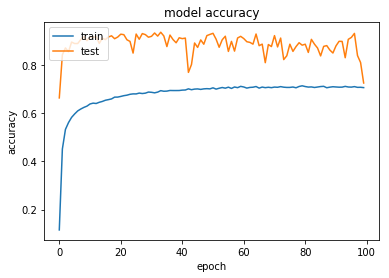

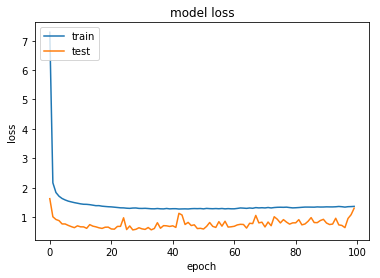

In [19]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("./graphs/accuracy/epoch20.jpg")
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("./graphs/loss/epoch20.jpg")
plt.show()

In [25]:
def predict(filename, model):
    path = os.path.join(TEST_DIR, filename)
#     print(path)
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    img = np.array(img)
    data = img.reshape(-1, IMG_SIZE,IMG_SIZE,1)
    res = get_labels()[0][np.argmax(model.predict(data))]
    return res

In [32]:
ctr_true = 0
ctr_total = 0
labels = os.listdir(TEST_DIR)
# labels
for label in labels:
    images = os.listdir(TEST_DIR + "/" + label)
#     print(images)
    for img in images:
        out = predict(label + "/" + img, m)
        if out == label:
            ctr_true += 1
        ctr_total += 1
    
print(ctr_true/ctr_total)

0.9786231884057971


In [27]:
m = load_model("model/97.86_accuracy.h5")

In [28]:
print(predict('character_1_ka/46226.png', cnn))

character_1_ka


In [13]:
cnn.save("model/97.86_accuracy.h5")